### Small test of creation of random, k-vertices poly images

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import mahotas

Image Size: (1920, 1092)


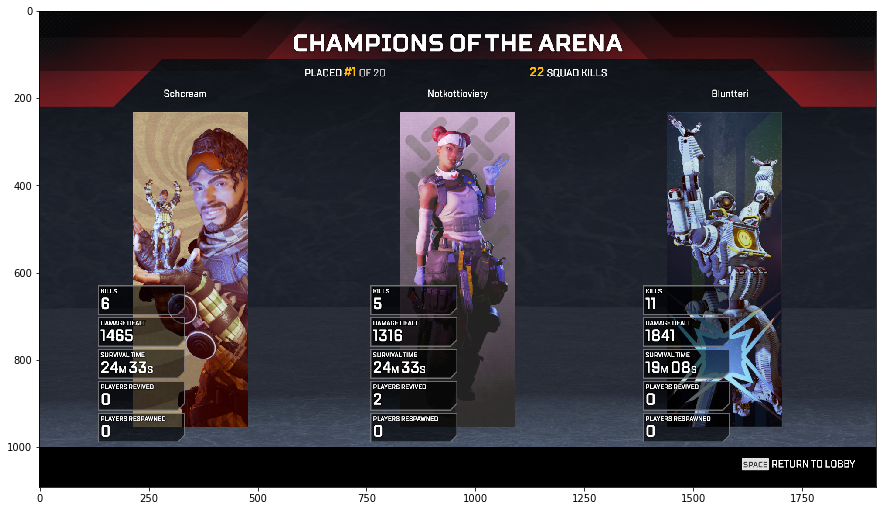

In [2]:
#load iamge
path='./apex.png'
img_orig  = Image.open(path)
print("Image Size:", img_orig.size)

#show
plt.figure(figsize=(15,15))
plt.imshow(img_orig)
plt.show()

In [4]:
#https://stackoverflow.com/a/41804815
def render(poly):
    xs = [i[0] for i in poly]
    ys = [i[1] for i in poly]
    minx, maxx = min(xs), max(xs)
    miny, maxy = min(ys), max(ys)
    X = maxx - minx + 1
    Y = maxy - miny + 1
    newPoly = [(x - minx, y - miny) for (x, y) in poly]           

    grid = np.zeros((X, Y), dtype=np.int8)
    mahotas.polygon.fill_polygon(newPoly, grid)

    return [(x + minx, y + miny) for (x, y) in zip(*np.nonzero(grid))]

In [41]:
#create new iamge data array
img_data = np.zeros((img_orig.size[1], img_orig.size[0], 3))

# for v in verts:
#     img_data[v[0]][v[1]] = img_orig.getpixel((int(v[1]), int(v[0])))

In [52]:
#get random points
n_vert = 1000
x = np.random.randint(0, img_orig.size[1], n_vert)
y = np.random.randint(0, img_orig.size[0], n_vert)
verts = np.stack([x,y], axis=1)
# verts=[0,0]
# for i1 in range(0, img_orig.size[1], 50):
#     for i2 in range(0, img_orig.size[0], 50):
#         verts = np.vstack((verts, [i1, i2]))
# print(verts.shape)

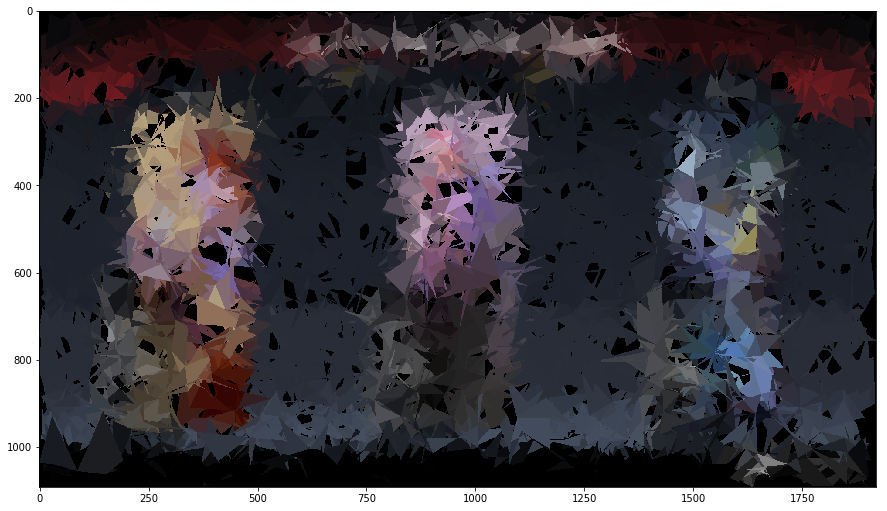

In [53]:
#get n_poly-1 nearest neighbours to gen polys
n_poly = 5

for v_s in verts:
    dist = np.zeros(verts.shape[0])
    for x in range(verts.shape[0]):
        dist[x] = np.linalg.norm(v_s-verts[x])
    dist_ind_sort = np.argsort(dist)
    v_pairs = verts[dist_ind_sort[:n_poly]]
    #print(v_pairs)
    
    #draw pairs
    rand_c = np.random.randint(0,255,3)
        
    #draw polys
    points = render(v_pairs)
    color = np.average([img_orig.getpixel((int(p[1]), int(p[0]))) for p in points], axis=0)
    for p in points:
        img_data[p[0]][p[1]] = color
    

#create PIL.Image from data array (x,y,3)
img = Image.fromarray(np.uint8(img_data), mode='RGB')
#show
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()